In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
#Load the data into python dataframe
data=pd.read_csv("Heart_Disease_data.csv")
#display the fiest 10 rows of the data
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
#display the number of rows and colums
data.shape

(1025, 14)

In [40]:
# count how many is male and female
gender_count = data['sex'].value_counts()
print(gender_count)

sex
1    206
0     96
Name: count, dtype: int64


In [4]:
# check null value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# check if any duplicates rows inthe dataframe
data_duplicate=data.duplicated().any()
print("any duplicate data is present:", data_duplicate)

any duplicate data is present: True


In [6]:
# Remove the duplicates values
data=data.drop_duplicates()
data.shape

(302, 14)

#  Analysis

In [7]:
# Compute the pairwise correlation of columns  
data.corr()
# !pip install seaborn --upgrade

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Text(0.5, 1.0, 'Correlation among all the attributes')

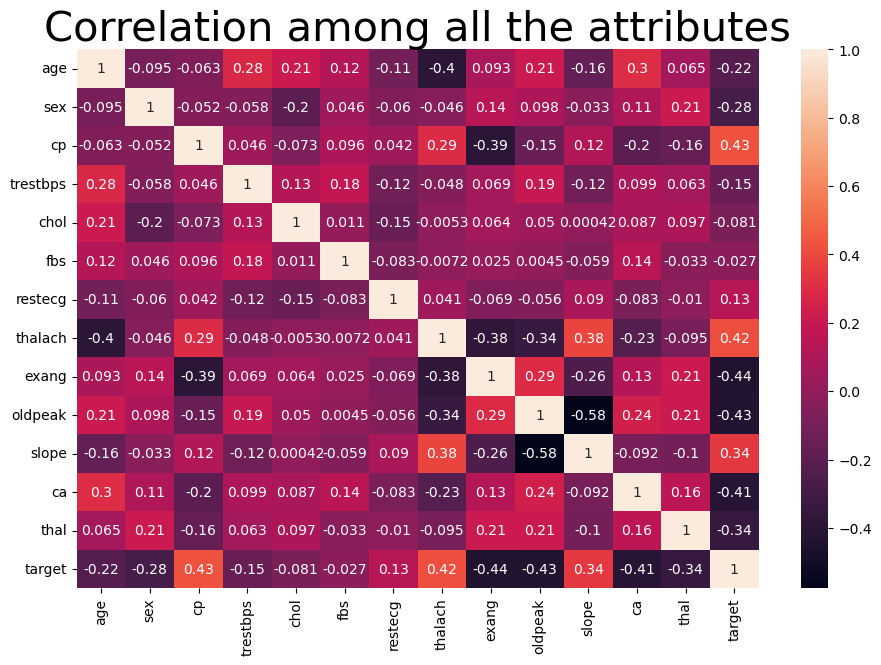

In [8]:
# Generate heatmap to visyalize the correlation matrix of the dataframe 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation among all the attributes', fontsize=30)

         

<Axes: xlabel='age', ylabel='Density'>

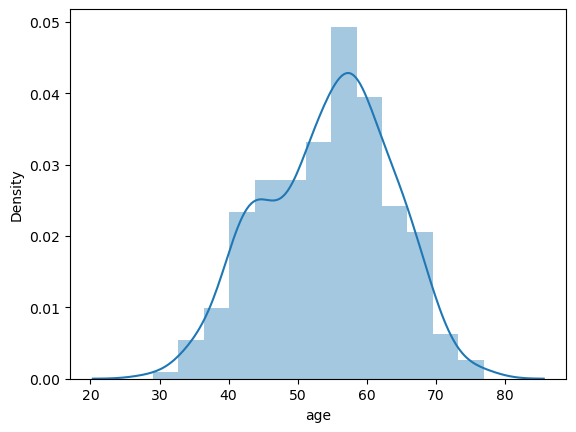

In [9]:
# Age distribution 
sns.distplot(data["age"])

In [10]:
# Find how many people have heart disese 
data["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

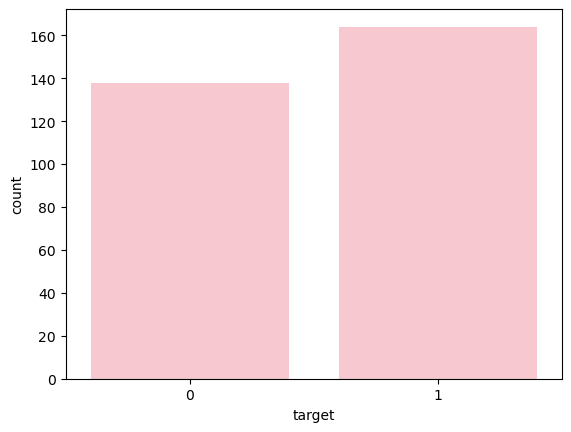

In [11]:
sns.countplot(x="target",data=data,color="pink")

In [12]:
# Count the value of "sex" in the dataframe
data["sex"].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

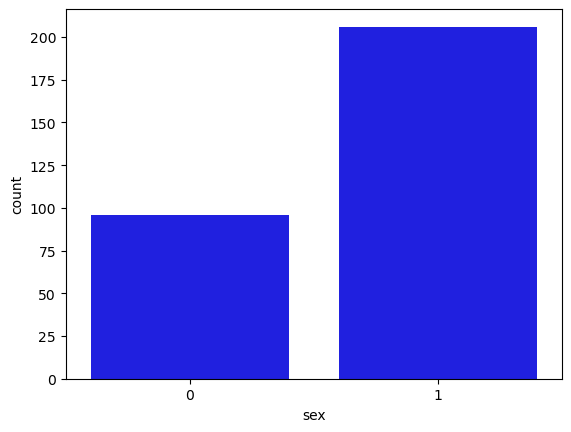

In [13]:
# Generate the countplot for the "sex" columns 
# Where 0 indicate the number of female and 1 is number of male
sns.countplot(x="sex",data=data,color="blue")

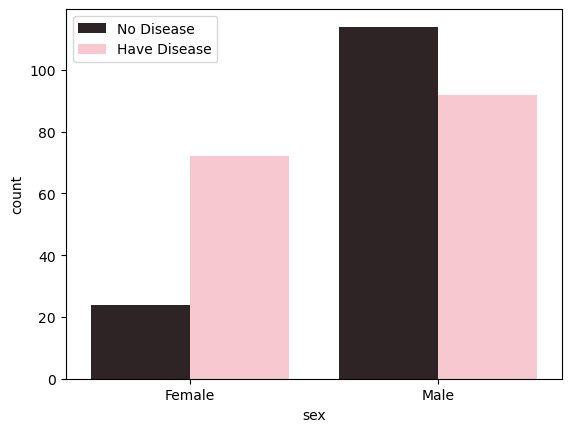

In [41]:
#Gender distribution of the target variable
sns.countplot(x="sex",hue="target",data=data,color="pink")
plt.xticks([0,1],["Female","Male"])
plt.legend(labels=(["No Disease","Have Disease"]))
plt.show()

In [15]:
# Check the counts of unique value in cp column
data["cp"].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1bfb4189590>,
 [Text(0, 0, 'typical Angina'),
  Text(1, 0, 'Atypical Angina'),
  Text(2, 0, 'non_Anginal pain'),
  Text(3, 0, 'asymption')])

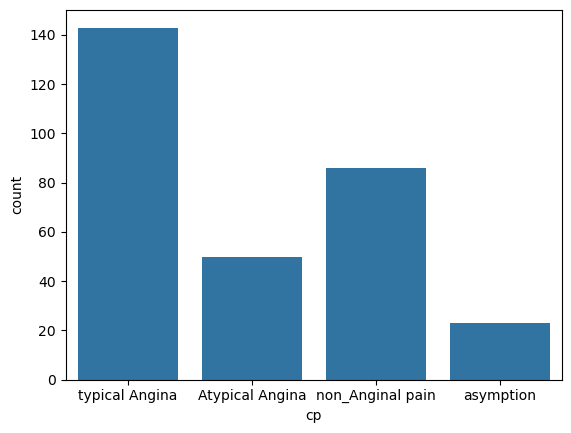

In [33]:
# Check chest pain type
sns.countplot(x="cp",data=data)
plt.xticks([0,1,2,3],["typical Angina" ,"Atypical Angina","non_Anginal pain","asymption"])


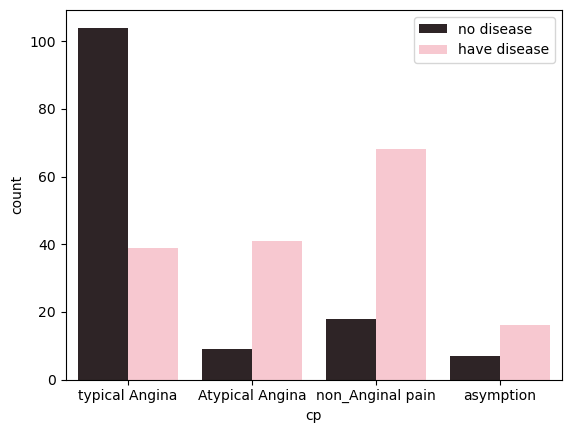

In [24]:
# Chest pain distribution 
sns.countplot(x="cp",hue="target",data=data,color="pink")
plt.xticks([0,1,2,3],["typical Angina" ,"Atypical Angina","non_Anginal pain","asymption"])
plt.legend(labels=(["no disease","have disease"]))
plt.show()


<Axes: xlabel='fbs', ylabel='count'>

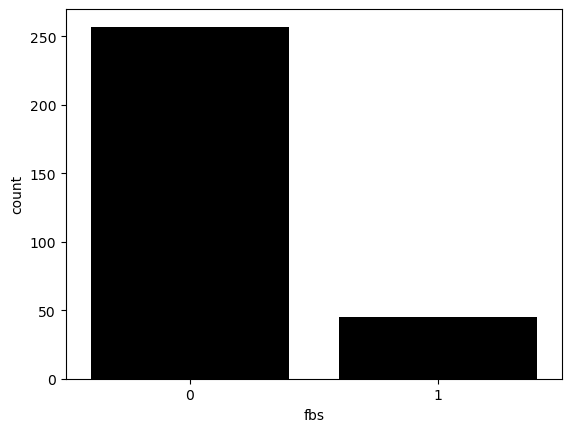

In [18]:
# Create a countplot for fbs column
sns.countplot(x="fbs",data=data,color="black")

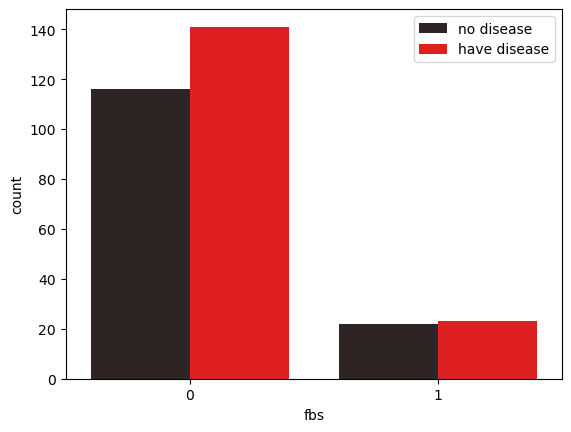

In [27]:
# Fasting suger distribution 
sns.countplot(x="fbs",hue="target",data=data,color="red")
plt.legend(labels=(["no disease","have disease"]))

<Axes: >

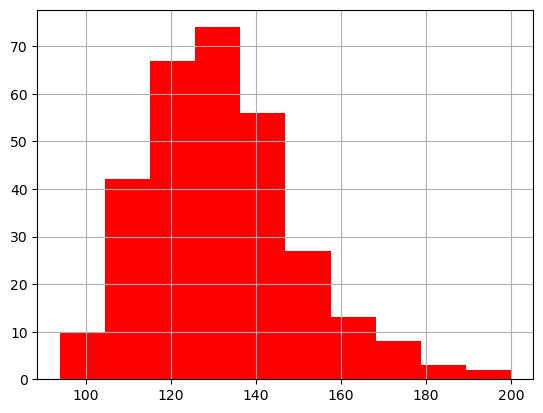

In [29]:
# Check resting blood preassure distribution
data["trestbps"].hist(color="red")

Text(0.5, 1.0, 'Trestbps')

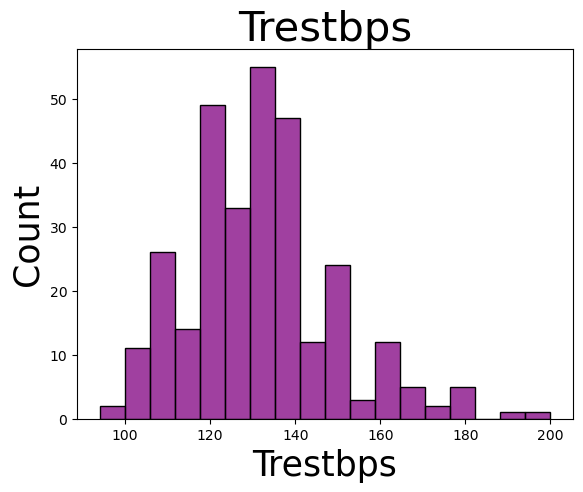

In [42]:
#Create the countplot for blood suger patient
sns.histplot(x='trestbps',color='purple',data=data)
plt.xlabel('Trestbps',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.title('Trestbps',fontsize=30)


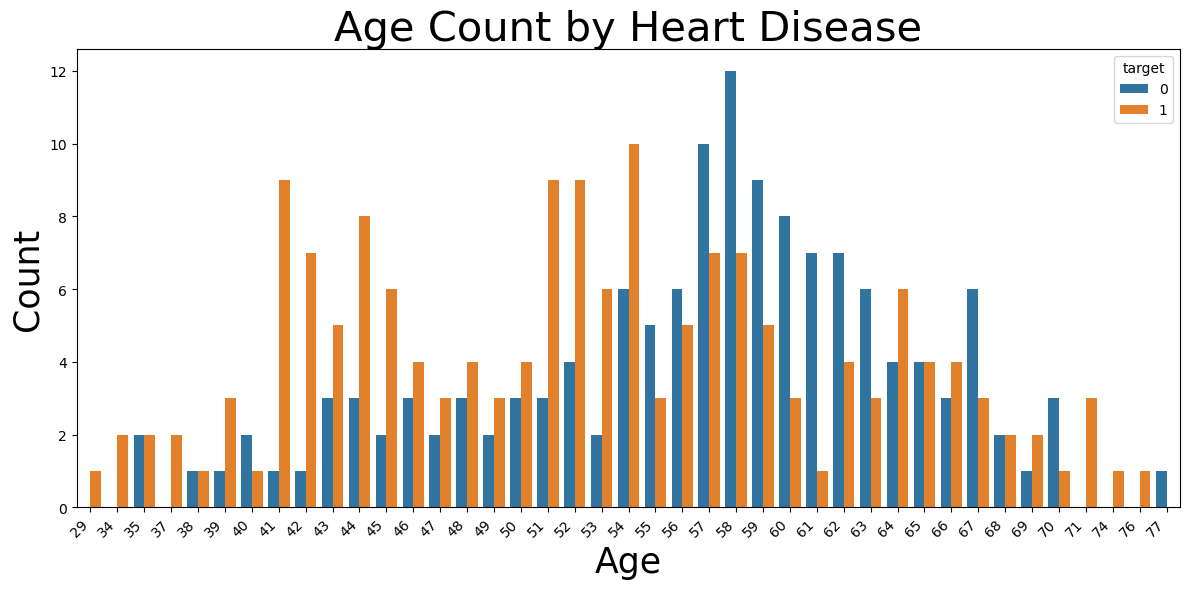

In [31]:
plt.figure(figsize=(12, 6)) # Increase figure size to provide more space
sns.countplot(x='age', hue='target', data=data)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.title('Age Count by Heart Disease', fontsize=30)
# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right') # Rotate by 45 degrees and align to the right
# Adjust the layout to ensure everything fits well
plt.tight_layout()

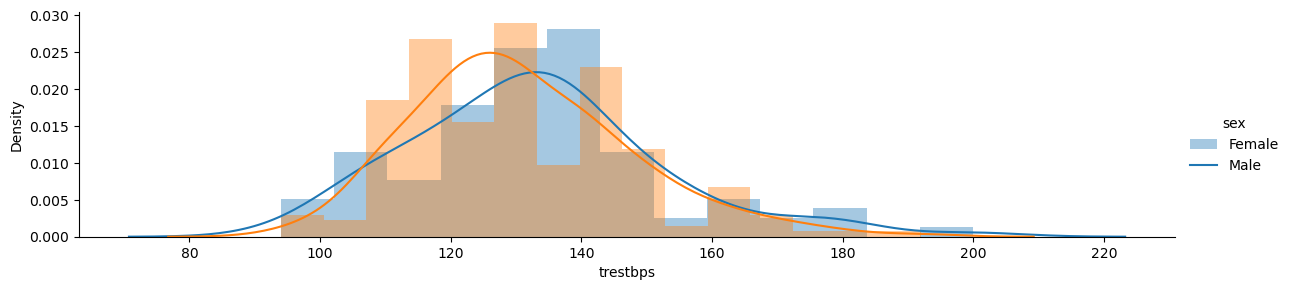

In [44]:
# Create a facetgrid to comapre the distridistribution of "trestbps" for different sexes.
df=sns.FacetGrid(data,hue="sex",aspect=4)
df=df.map(sns.distplot,"trestbps")
df.add_legend(labels=(["Female","Male"]))
plt.show()

In [46]:

# 1. There were 96 female and 206 male participants in the dataset.

# 2. In Target 138 were NORMAL while 164 have FIXED DEFECT

# 3. In CHEST PAIN TYPE:

# A. Typical angina: 143

# B. Atypical angina: 50

# C. Non-anginal pain: 86

# D. Asymptomatic: 23

# 4. This dataset includes an age range from a minimum of 29 to a maximum of 77.

# 5. 205 individuals have a resting blood pressure greater than 120.

# 6.Fasting blood sugar was true for 45 individuals and false for 257 individuals.